# The "Unstructured" File Structure

The data was supposedly written in sequence between a `unint64_t` timestamp and a `float` temperature reading

In [1]:
import struct
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import os
import seaborn as sns

,timestamp,temperature
0,114669332,26.202177
1,114669382,26.670322
2,114669406,26.202177
3,114669425,26.670322
4,114669477,26.670322
...,...,...
34995,154118166,26.202177
34996,154118182,26.202177
34997,154118198,26.202177
34998,154118214,26.202177


,timestamp,temperature
count,3.500000e+04,3.500000e+04
mean,3.358545e+08,-2.507184e+10
std,2.634577e+09,6.119020e+11
min,1.146693e+08,-1.517466e+13
25%,1.245540e+08,2.620218e+01
50%,1.344645e+08,2.620218e+01
75%,1.444012e+08,2.620218e+01
max,3.943419e+10,3.228795e+01


array([50, 24, 19, ..., 16, 16, 16], dtype=int64)

mean time difference between measurements: 16.0 ± 15561680.940976974 µs
percentage error: 97260505.88110608
mean frequency measurements: 62500.0 ± 60787816175.6913 Hz
percentage error: 97260505.88110608


Text(0, 0.5, 'Frequency')

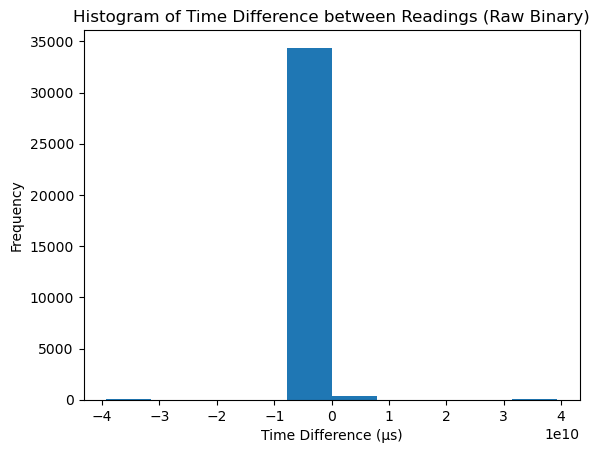

In [2]:
folder_path = "../../bin_data"

timestamps = []
temperatures = []
with open ("../../unstruct_bin_colsize2/temp_data_35000_entries_270225_00;52;23.bin", "rb") as bin_file:
    while True:
        timestamp_bytes = bin_file.read(8)
        if len(timestamp_bytes) != 8:
            break 
        temperature_bytes = bin_file.read(4)
        timestamp = struct.unpack("<Q", timestamp_bytes)[0]
        temperature = struct.unpack("<f", temperature_bytes)[0]
        timestamps.append(timestamp)
        temperatures.append(temperature)

df = pd.DataFrame({"timestamp":timestamps,
                   "temperature":temperatures})

display(df)
display(df.describe())

time_diffs = np.diff(df["timestamp"])
display(time_diffs)

print(f"mean time difference between measurements: {np.median(time_diffs)   } ± {stats.sem(time_diffs)} µs")
print(f"percentage error: {stats.sem(time_diffs)/np.median(time_diffs) * 100}")

print(f"mean frequency measurements: {1/np.median(time_diffs) * 1E6} ± {(1/np.median(time_diffs)**2)*stats.sem(time_diffs) * 1E6} Hz")
print(f"percentage error: {(1/np.median(time_diffs)**2)*(stats.sem(time_diffs))/(1/np.median(time_diffs)) * 100}")

plt.hist(time_diffs)
plt.title("Histogram of Time Difference between Readings (Raw Binary)")
plt.xlabel("Time Difference (µs)")
plt.ylabel("Frequency")


,timestamp,raw_adc_reading,temperature
0,10852814,879,25.734044
1,10852826,879,25.734044
2,10852838,879,25.734044
3,10852877,879,25.734044
4,10852889,878,26.202181
...,...,...,...
14995,25102241,878,26.202181
14996,25102253,878,26.202181
14997,25102265,879,25.734044
14998,25102278,878,26.202181


,timestamp,raw_adc_reading,temperature
count,1.500000e+04,15000.000000,15000.000000
mean,3.845312e+07,1000.623333,-31.202359
std,3.138550e+08,1825.952554,854.796254
min,1.085281e+07,868.000000,-12985.202208
25%,1.437277e+07,878.000000,25.734044
50%,1.804475e+07,878.000000,26.202181
75%,2.161933e+07,879.000000,26.202181
max,6.398348e+09,28672.000000,30.883552


,timestamp,raw_adc_reading,temperature
0,10852814,879,25.734044
1,10852826,879,25.734044
2,10852838,879,25.734044
3,10852877,879,25.734044
4,10852889,878,26.202181
...,...,...,...
14995,25102241,878,26.202181
14996,25102253,878,26.202181
14997,25102265,879,25.734044
14998,25102278,878,26.202181


mean time difference between measurements: 12.0 ± 3571525.0780225964 µs
percentage error: 29762708.983521637
mean frequency measurements: 83333.33333333333 ± 24802257486.268032 Hz
percentage error: 29762708.98352164


-6373336533

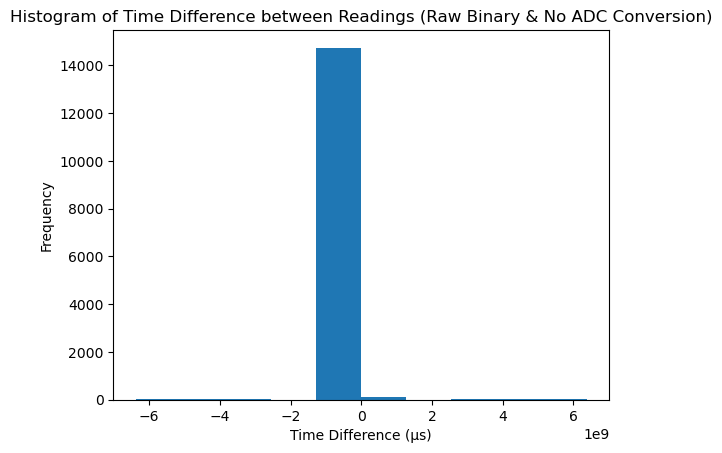

In [3]:
folder_path = "../../bin_data"
conversionFactor = 3.3 / (1 << 12)

timestamps = []
temperatures = []
with open ("../../unstruct_bin_opt_colsize2/temp_data_15000_entries_010325_17;34;58.bin", "rb") as bin_file:
    while True:
        timestamp_bytes = bin_file.read(8)
        if len(timestamp_bytes) != 8:
            break 
        temperature_bytes = bin_file.read(2)
        timestamp = struct.unpack("<Q", timestamp_bytes)[0]
        temperature = struct.unpack("<H", temperature_bytes)[0]
        timestamps.append(timestamp)
        temperatures.append(temperature)

df = pd.DataFrame({"timestamp":timestamps,
                   "raw_adc_reading":temperatures})

df["temperature"] = 27.0 - (((df["raw_adc_reading"])*conversionFactor) - 0.706) / 0.001721

display(df)
display(df.describe())

time_diffs = np.diff(df["timestamp"])
display(df)

print(f"mean time difference between measurements: {np.median(time_diffs)} ± {stats.sem(time_diffs)} µs")
print(f"percentage error: {stats.sem(time_diffs)/np.median(time_diffs) * 100}")

print(f"mean frequency measurements: {1/np.median(time_diffs) * 1E6} ± {(1/np.median(time_diffs)**2)*stats.sem(time_diffs) * 1E6} Hz")
print(f"percentage error: {(1/np.median(time_diffs)**2)*(stats.sem(time_diffs))/(1/np.median(time_diffs)) * 100}")

plt.hist(time_diffs)
plt.title("Histogram of Time Difference between Readings (Raw Binary & No ADC Conversion)")
plt.xlabel("Time Difference (µs)")
plt.ylabel("Frequency")
display(time_diffs.min())


I did not obtain these readings in the sun... or did I have the power of the sun in the palm of my hand >:)

### Scaling the Timestamp Difference Comparison for `unstruct_bin_colsize2` vs `unstruct_bin_opt_colsize2`

opt_colsize2
colsize2

opt_colsize2 Analysis:
Median time difference: 12.0 ± 340042350.94675285 µs
Percentage error: 2833686257.8896%
Median frequency: 83333.33 ± 2361405214908.01 Hz
Percentage error: 2833686257.8896%


12.0


colsize2 Analysis:
Median time difference: 16.0 ± 3827923213.356102 µs
Percentage error: 23924520083.4756%
Median frequency: 62500.00 ± 14952825052172.27 Hz
Percentage error: 23924520083.4756%


16.0

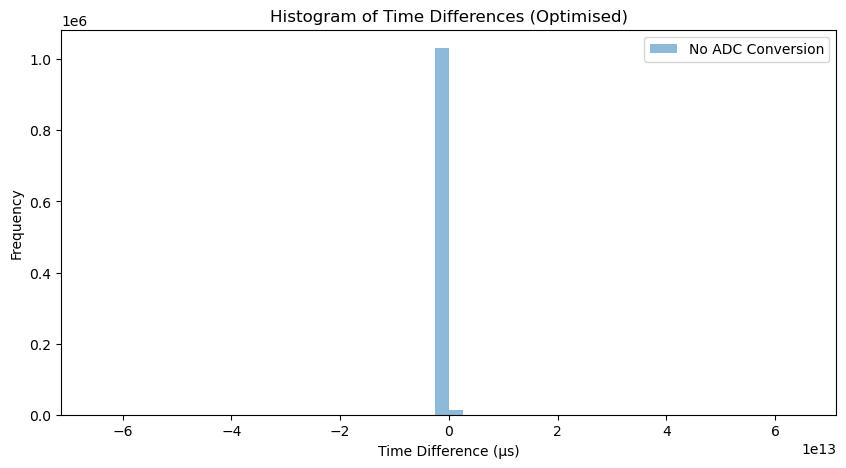

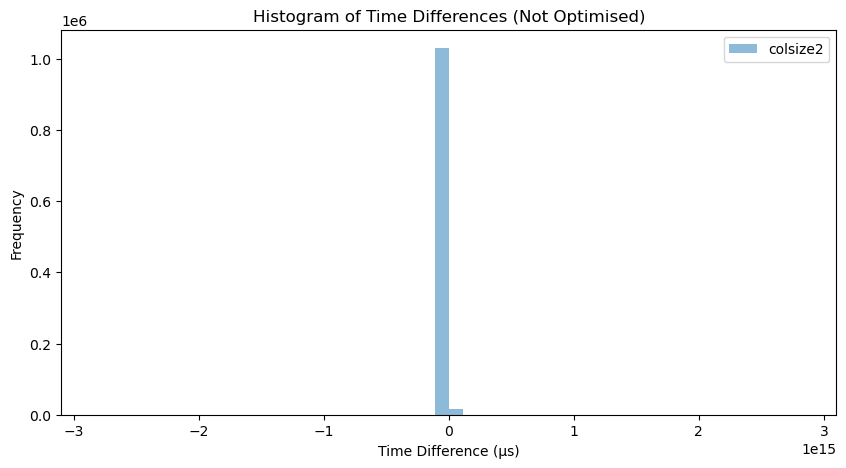

In [4]:
folders = {
    "opt_colsize2": "../../unstruct_bin_opt_colsize2",
    "colsize2": "../../unstruct_bin_colsize2"
}

data = {"opt_colsize2": [], "colsize2": []}
time_diffs = {"opt_colsize2": [], "colsize2": []}

conversionFactor = 3.3 / (1 << 12) #taken from pico doc

for category, folder in folders.items():
    print(category)
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)
        timestamps = []
        temperatures = []
        
        with open(file_path, "rb") as bin_file:
            # If statements to ensure correct sequence of bits is read
            if folder == "../../unstruct_bin_opt_colsize2": # Direct ADC Reading
                temp_bits = 2
                data_type = "<H"
            else:
                temp_bits = 4
                data_type = "<f"

            while True:
                timestamp_bytes = bin_file.read(8)
                if len(timestamp_bytes) != 8:
                    break
                temperature_bytes = bin_file.read(temp_bits)
                timestamp = struct.unpack("<Q", timestamp_bytes)[0]
                temperature = struct.unpack(data_type, temperature_bytes)[0]
                timestamps.append(timestamp)
                temperatures.append(temperature)

        df = pd.DataFrame({"timestamp": timestamps, "raw_adc_reading": temperatures})
        
        if folder == "../../unstruct_bin_opt_colsize2":
            df["temperature"] = 27.0 - (((df["raw_adc_reading"]) * conversionFactor) - 0.706) / 0.001721
        else:
            df["temperature"] = df["raw_adc_reading"]
        
        time_diff = np.diff(df["timestamp"])
        
        data[category].append(df)
        time_diffs[category].append(time_diff)


df_opt_colsize2 = pd.concat(data["opt_colsize2"], ignore_index=True)
df_colsize2 = pd.concat(data["colsize2"], ignore_index=True)

combined_time_diffs = {
    category: np.concatenate(time_diffs[category]) for category in time_diffs
}

for name, diffs in combined_time_diffs.items():
    median_diff = np.median(diffs)
    sem_diff = stats.sem(diffs)
    
    print(f"\n{name} Analysis:")
    print(f"Median time difference: {median_diff} ± {sem_diff} µs")
    print(f"Percentage error: {sem_diff / median_diff * 100:.4f}%")
    print(f"Median frequency: {1 / median_diff * 1E6:.2f} ± {(1 / median_diff**2) * sem_diff * 1E6:.2f} Hz")
    print(f"Percentage error: {(1 / median_diff**2) * sem_diff / (1 / median_diff) * 100:.4f}%")

    display(median_diff)

plt.figure(figsize=(10, 5))
plt.hist(combined_time_diffs["opt_colsize2"], alpha=0.5, label="No ADC Conversion", bins=50)
plt.title("Histogram of Time Differences (Optimised)")
plt.xlabel("Time Difference (µs)")
plt.ylabel("Frequency")
plt.legend()
plt.savefig("Time_Diffs_no_conv.png", dpi=1000, bbox_inches="tight")
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(combined_time_diffs["colsize2"], alpha=0.5, label="colsize2", bins=50)
plt.title("Histogram of Time Differences (Not Optimised)")
plt.xlabel("Time Difference (µs)")
plt.ylabel("Frequency")
plt.legend()
plt.savefig("Time_Diffs_conv.png", dpi=1000, bbox_inches="tight")
plt.show()


### Why are the Absolute Errors so Big?

In [5]:
import struct
folder_path = "../../bin_data"
conversionFactor = 3.3 / (1 << 12)

timestamps = []
temperatures = []
with open ("../../unstruct_bin_opt_colsize2/temp_data_15000_entries_010325_17;34;58.bin", "rb") as bin_file:
    while True:
        timestamp_bytes = bin_file.read(8)
        if len(timestamp_bytes) != 8:
            break 
        temperature_bytes = bin_file.read(2)
        timestamp = struct.unpack("<Q", timestamp_bytes)[0]
        temperature = struct.unpack("<H", temperature_bytes)[0]
        timestamps.append(timestamp)
        temperatures.append(temperature)

df = pd.DataFrame({"timestamp":timestamps,
                   "raw_adc_reading":temperatures})

df["temperature"] = 27.0 - (((df["raw_adc_reading"])*conversionFactor) - 0.706) / 0.001721

display(df.describe())


# Identifying the Non-Sensical rows
df["time difference"] = np.diff(df["timestamp"], prepend=df["timestamp"].iloc[0])
display(df[(df["temperature"] > 10000)|(df["temperature"] < 20)])

# If the time diff obtained was += 10* standard deviation from the mean, its nonsense
threshold = 10* np.std(df["time difference"]) 
display(df[(df["time difference"] > ((np.mean(df["time difference"]) + threshold)))|(df["time difference"] < (np.mean(df["time difference"]) - threshold))])


,timestamp,raw_adc_reading,temperature
count,1.500000e+04,15000.000000,15000.000000
mean,3.845312e+07,1000.623333,-31.202359
std,3.138550e+08,1825.952554,854.796254
min,1.085281e+07,868.000000,-12985.202208
25%,1.437277e+07,878.000000,25.734044
50%,1.804475e+07,878.000000,26.202181
75%,2.161933e+07,879.000000,26.202181
max,6.398348e+09,28672.000000,30.883552


,timestamp,raw_adc_reading,temperature,time difference
366,2846886413,28160,-12745.515979,2835765776
429,2868185613,28416,-12865.359094,2856981775
482,2883455501,28416,-12865.359094,2872192022
500,2896300557,28416,-12865.359094,2884986908
586,2900822541,28416,-12865.359094,2889491215
...,...,...,...,...
14001,6188435981,28160,-12745.515979,6164262415
14019,6202067469,28160,-12745.515979,6177840656
14603,6343166477,28160,-12745.515979,6318388496
14617,6349130253,28160,-12745.515979,6324328976


,timestamp,raw_adc_reading,temperature,time difference
6675,4395239949,28160,-12745.515979,4378071055
6676,17229037,878,26.202181,-4378010912
6864,4456253965,28160,-12745.515979,4438846761
6865,17408915,878,26.202181,-4438845050
7063,4502522381,28160,-12745.515979,4484934416
...,...,...,...,...
14604,24801051,878,26.202181,-6318365426
14617,6349130253,28160,-12745.515979,6324328976
14618,24814469,878,26.202181,-6324315784
14823,6398347789,28160,-12745.515979,6373354255


In [6]:
import struct
folder_path = "../../bin_data"
conversionFactor = 3.3 / (1 << 12)

timestamps = []
temperatures = []
with open ("../../unstruct_bin_colsize2/temp_data_15000_entries_270225_00;52;23.bin", "rb") as bin_file:
    while True:
        timestamp_bytes = bin_file.read(8)
        if len(timestamp_bytes) != 8:
            break 
        temperature_bytes = bin_file.read(4)
        timestamp = struct.unpack("<Q", timestamp_bytes)[0]
        temperature = struct.unpack("<f", temperature_bytes)[0]
        timestamps.append(timestamp)
        temperatures.append(temperature)

df = pd.DataFrame({"timestamp":timestamps,
                   "raw_adc_reading":temperatures})

df["temperature"] = df["raw_adc_reading"]


df["time difference"] = np.diff(df["timestamp"], prepend=df["timestamp"].iloc[0])
display(df)
display(df.describe())
display(df[(df["temperature"] > 10000)|(df["temperature"] < 20)])

threshold = 10* np.std(df["time difference"]) 
print(threshold)
display(df[(df["time difference"] > ((np.mean(df["time difference"]) + threshold)))|(df["time difference"] < (np.mean(df["time difference"]) - threshold))])





,timestamp,raw_adc_reading,temperature,time difference
0,12977381,26.202177,26.202177,0
1,12977402,26.202177,26.202177,21
2,12977445,26.202177,26.202177,43
3,12977463,25.734034,25.734034,18
4,12977479,26.202177,26.202177,16
...,...,...,...,...
14995,29820993,26.202177,26.202177,16
14996,29821009,26.202177,26.202177,16
14997,29821025,26.202177,26.202177,16
14998,29821041,26.202177,26.202177,16


,timestamp,raw_adc_reading,temperature,time difference
count,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04
mean,4.246928e+07,-2.717611e+08,-2.717611e+08,1.122912e+03
std,3.566947e+08,4.792712e+09,4.792712e+09,5.024424e+08
min,1.297738e+07,-8.485706e+10,-8.485706e+10,-7.602309e+09
25%,1.715361e+07,2.620218e+01,2.620218e+01,1.600000e+01
50%,2.139671e+07,2.620218e+01,2.620218e+01,1.600000e+01
75%,2.567082e+07,2.620218e+01,2.620218e+01,1.600000e+01
max,7.632129e+09,3.181980e+01,3.181980e+01,7.602316e+09


,timestamp,raw_adc_reading,temperature,time difference
70,3322547467,-8.485706e+10,-8.485706e+10,3309568784
282,3388410381,-4.682957e+08,-4.682957e+08,3375174419
694,3517778445,-4.682957e+08,-4.682957e+08,3504037139
1026,3614050829,-8.485706e+10,-8.485706e+10,3599933459
1307,3687320077,-8.485706e+10,-8.485706e+10,3672916499
1546,3768322573,-8.485706e+10,-8.485706e+10,3753602614
1810,3837528589,-8.485706e+10,-8.485706e+10,3822538259
2562,4050389517,-8.485706e+10,-8.485706e+10,4034567699
3620,4358605325,-4.682957e+08,-4.682957e+08,4341579539
3771,4391373325,-4.682957e+08,-4.682957e+08,4374219539


5024256404.832634


,timestamp,raw_adc_reading,temperature,time difference
6468,5187963405,-8.485706e+10,-8.485706e+10,5167697940
6469,20277265,2.620218e+01,2.620218e+01,-5167686140
7216,5396236813,-8.485706e+10,-8.485706e+10,5375157779
7217,21121725,2.620218e+01,2.620218e+01,-5375115088
7290,5407509005,-8.485706e+10,-8.485706e+10,5386385939
...,...,...,...,...
14575,29427141,2.620218e+01,2.620218e+01,-7495025736
14600,7533496845,-8.485706e+10,-8.485706e+10,7504069139
14601,29456482,2.620218e+01,2.620218e+01,-7504040363
14922,7632128525,-8.485706e+10,-8.485706e+10,7602315573


#### Finding the Percentage of Bad Readings against Data Shape

opt_colsize2
opt_buffer_colsize2
colsize2

opt_colsize2 Analysis:
Median time difference: 12.0 ± 0.0005336054521703362 µs
Mean time difference: 12.443990423676485 ± 0.0005336054521703362 µs
Manual SEM: 0.0005336054521703362 µs, Library SEM: 0.0005336057411965008 µs
Percentage error: 0.004288057399618975%
Median frequency: 83333.33333333333 ± 3.7055934178495566 Hz
Mean frequency: 80360.07469897726 ± 3.44588612946883 Hz

opt_buffer_colsize2 Analysis:
Median time difference: 12.0 ± 0.0005340118093083292 µs
Mean time difference: 12.443416552834291 ± 0.0005340118093083292 µs
Manual SEM: 0.0005340118093083292 µs, Library SEM: 0.000534012098544883 µs
Percentage error: 0.004291520797691972%
Median frequency: 83333.33333333333 ± 3.7084153424189523 Hz
Mean frequency: 80363.78077950189 ± 3.4488283659639074 Hz

colsize2 Analysis:
Median time difference: 16.0 ± 0.0003249147278436276 µs
Mean time difference: 16.046793390651874 ± 0.0003249147278436276 µs
Manual SEM: 0.0003249147278436276 µs, Library 

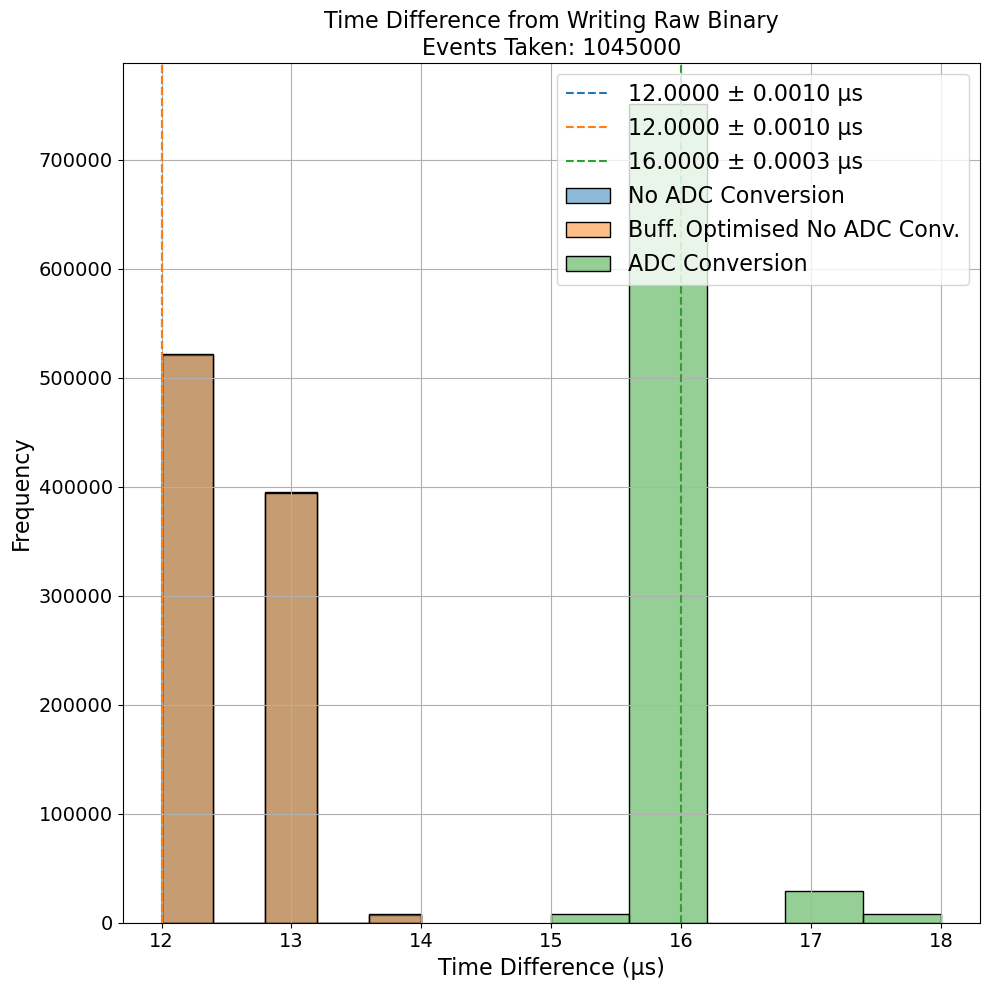

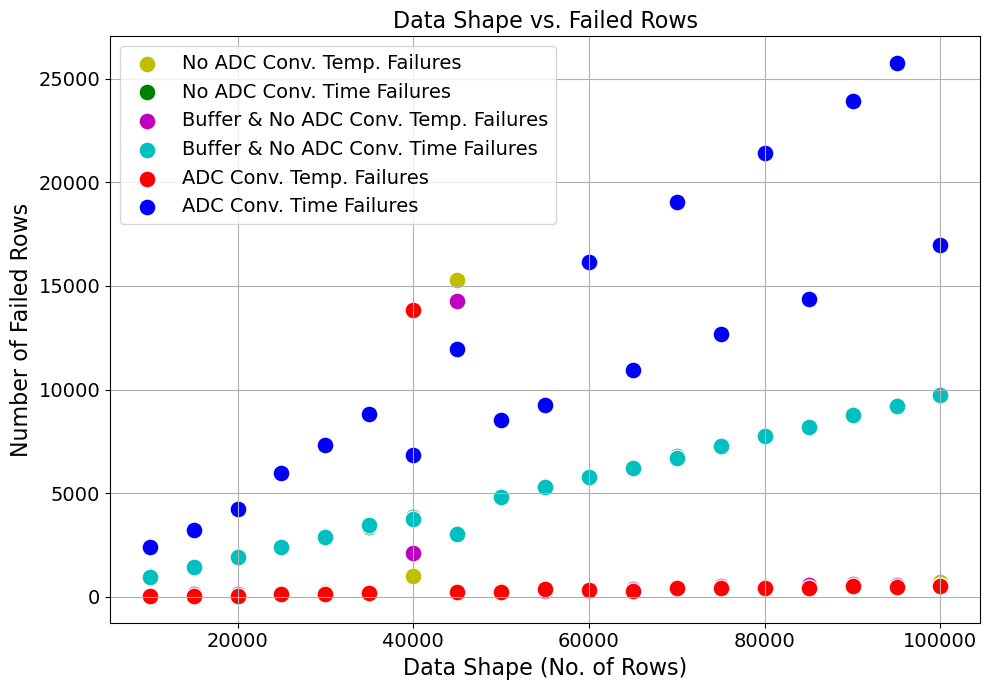

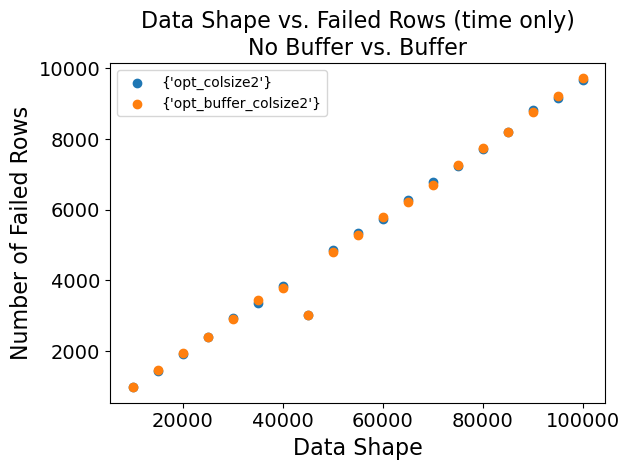

In [15]:
folders = {
    "opt_colsize2": "../../unstruct_bin_opt_colsize2",
    "opt_buffer_colsize2": "../../unstruct_bin_opt_buffer_colsize2",
    "colsize2": "../../unstruct_bin_colsize2"
}

data = {"opt_colsize2": [],"opt_buffer_colsize2": [], "colsize2": []}
time_diffs = {"opt_colsize2": [],"opt_buffer_colsize2": [], "colsize2": []}

failures = {"opt_colsize2": {"num_rows": [], "temp_failures": [], "time_failures": []},
            "opt_buffer_colsize2": {"num_rows": [], "temp_failures": [], "time_failures": []},
            "colsize2": {"num_rows": [], "temp_failures": [], "time_failures": []}}

conversionFactor = 3.3 / (1 << 12)

for category, folder in folders.items():
    print(category)
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)
        timestamps = []
        temperatures = []
        data_shape = int(filename.split("_")[2])  # Ensure it's stored as an integer

        with open(file_path, "rb") as bin_file:
            if folder == "../../unstruct_bin_colsize2":
                temp_bits = 4
                data_type = "<f"
            else:
                temp_bits = 2
                data_type = "<H"
            while True:
                timestamp_bytes = bin_file.read(8)
                if len(timestamp_bytes) != 8:
                    break
                temperature_bytes = bin_file.read(temp_bits)
                timestamp = struct.unpack("<Q", timestamp_bytes)[0]
                temperature = struct.unpack(data_type, temperature_bytes)[0]
                timestamps.append(timestamp)
                temperatures.append(temperature)

        df = pd.DataFrame({"timestamp": timestamps, "raw_adc_reading": temperatures})

        if folder == "../../unstruct_bin_opt_colsize2":
            df["temperature"] = 27.0 - (((df["raw_adc_reading"]) * conversionFactor) - 0.706) / 0.001721
        else:
            df["temperature"] = df["raw_adc_reading"]

        df["time difference"] = np.diff(df["timestamp"], prepend=df["timestamp"].iloc[0])

        # Filter out nonsense temperature values
        temp_filtered_df = df[(df["temperature"] >= 20) & (df["temperature"] <= 10000)]
        
        # implementing IQR-based filtering. Gave stronger effect as using std threshold.
        q1, q3 = np.percentile(temp_filtered_df["time difference"], [25, 75])
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # Hard threshold to remove extreme outliers
        max_allowed_diff = 10 * np.std(temp_filtered_df["time difference"])
        
        time_filtered_df = temp_filtered_df[
            (temp_filtered_df["time difference"] >= max(lower_bound, 0)) &
            (temp_filtered_df["time difference"] <= min(upper_bound, max_allowed_diff))
        ]

        # Remove negative time differences (or I time travelled... not)
        negative_failures = len(time_filtered_df[time_filtered_df["time difference"] < 0])
        time_filtered_df = time_filtered_df[time_filtered_df["time difference"] >= 0]
        
        # Data of Failiures
        failures[category]["num_rows"].append(data_shape)
        failures[category]["temp_failures"].append(len(df) - len(temp_filtered_df))
        failures[category]["time_failures"].append(len(temp_filtered_df) - len(time_filtered_df) + negative_failures)

        data[category].append(time_filtered_df)
        time_diffs[category].append(time_filtered_df["time difference"].to_numpy())

# Convert failures dictionary to DataFrame for plotting
failures_df = {cat: pd.DataFrame(failures[cat]) for cat in failures}

# Concatenate good time data
combined_time_diffs = {category: np.concatenate(time_diffs[category]) for category in time_diffs}
median_labels = {}
# Calculate median and mean time differences with sensible errors (it worked)
for name, diffs in combined_time_diffs.items():
    if len(diffs) == 0:
        print(f"\n{name} Analysis: No valid time differences after filtering.")
        continue
    
    median_diff = np.median(diffs)
    mean_diff = np.mean(diffs)
    std_dev = np.std(diffs) 
    sem_manual = std_dev / np.sqrt(len(diffs)) #wanted to check this,
    sem_lib = stats.sem(diffs)
    
    print(f"\n{name} Analysis:")
    print(f"Median time difference: {median_diff} ± {sem_manual} µs")
    print(f"Mean time difference: {mean_diff} ± {sem_manual} µs")
    print(f"Manual SEM: {sem_manual} µs, Library SEM: {sem_lib} µs")
    print(f"Percentage error: {sem_manual / mean_diff * 100}%")
    print(f"Median frequency: {1 / median_diff * 1E6} ± {(1 / median_diff**2) * sem_manual * 1E6} Hz")
    print(f"Mean frequency: {1 / mean_diff * 1E6} ± {(1 / mean_diff**2) * sem_manual * 1E6} Hz")
    if name == "colsize2":
        median_labels[name] = [f"{median_diff:.2f}00 ± {sem_manual:.4f} µs", median_diff]
    else:
        median_labels[name] = [f"{median_diff:.2f}00 ± {sem_manual:.3f}0 µs", median_diff]

palette = {"opt_colsize2": "tab:blue",
           "opt_buffer_colsize2": "tab:orange",
           "colsize2": "tab:green"}
# Plotting histogram of time diffs
plt.figure(figsize=(10, 10))
no_events = np.sum(np.arange(10000, 100001, 5000))
sns.histplot(combined_time_diffs["opt_colsize2"], kde=False, label="No ADC Conversion", bins=5, alpha=0.5)
sns.histplot(combined_time_diffs["opt_buffer_colsize2"], kde=False, label="Buff. Optimised No ADC Conv.", bins=5, alpha=0.5)
sns.histplot(combined_time_diffs["colsize2"], kde=False, label="ADC Conversion", bins=5, alpha=0.5)
plt.axvline(median_labels["opt_colsize2"][1], color=palette["opt_colsize2"], linestyle='--', label=median_labels["opt_colsize2"][0])
plt.axvline(median_labels["opt_buffer_colsize2"][1], color=palette["opt_buffer_colsize2"], linestyle='--', label=median_labels["opt_buffer_colsize2"][0])
plt.axvline(median_labels["colsize2"][1], color=palette["colsize2"], linestyle='--', label=median_labels["colsize2"][0])
plt.xlabel("Time Difference (µs)", fontsize = 16)
plt.ylabel("Frequency", fontsize = 16)
plt.legend(fontsize = 16)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(f"Time Difference from Writing Raw Binary\nEvents Taken: {no_events}", fontsize = 16)
plt.tight_layout()
plt.savefig("Histograms of Raw Bin.pdf", bbox_inches = "tight", format = "pdf")
plt.show()

category_colors = {
    "opt_colsize2": {"temp_failures": "y", "time_failures": "g"},
    "opt_buffer_colsize2": {"temp_failures": "m", "time_failures": "c"},
    "colsize2": {"temp_failures": "r", "time_failures": "b"} 
}

smaller_labels = {
    "opt_colsize2": "No ADC Conv.",
    "opt_buffer_colsize2": "Buffer & No ADC Conv.",
    "colsize2": "ADC Conv." 
}

# Plotting percentage of failed rows
plt.figure(figsize=(10, 7))
for category, df in failures_df.items():
    sns.scatterplot(data=df, x="num_rows", y="temp_failures", label=f"{smaller_labels[category]} Temp. Failures", color=category_colors[category]["temp_failures"], s = 150)
    sns.scatterplot(data=df, x="num_rows", y="time_failures", label=f"{smaller_labels[category]} Time Failures", color=category_colors[category]["time_failures"], s = 150)
    plt.xlabel("Data Shape (No. of Rows)", fontsize = 16)
    plt.ylabel("Number of Failed Rows", fontsize = 16)
    plt.title(f"Data Shape vs. Failed Rows", fontsize = 16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14) 
    plt.grid(True)
    plt.legend(fontsize = 14)
    plt.tight_layout()
plt.savefig(f"failed data.pdf", format = "pdf", bbox_inches = "tight")
plt.show()

# Plotting for only time
plt.figure(3)
for category, df in failures_df.items():
    if category == "colsize2":
        pass
    else:
        plt.scatter(df["num_rows"], df["time_failures"], label = {category})
        plt.xlabel("Data Shape", fontsize = 16)
        plt.ylabel("Number of Failed Rows", fontsize = 16)
        plt.title(f"Data Shape vs. Failed Rows (time only)\nNo Buffer vs. Buffer", fontsize = 16)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.legend()
        plt.tight_layout()
plt.savefig(f"failed data_time_only.pdf", format = "pdf", bbox_inches = "tight")
plt.show()


### Timestmp Length Evolution with Time

It diddn't really. No good plot can show this. We're not making it to https://www.biostat.wisc.edu/~kbroman/topten_worstgraphs/ plz

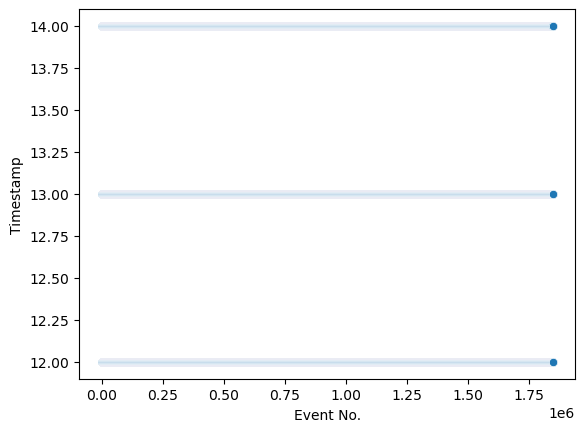

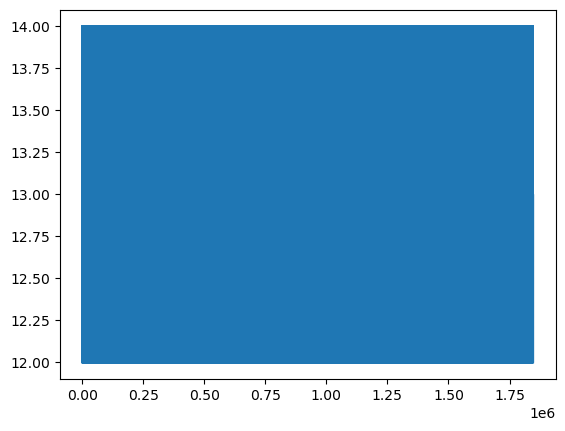

In [8]:
all_valid_timestamp_diffs = np.concatenate(list(combined_time_diffs.values())[:-1])
valid_timestamp_df = pd.DataFrame({"Event No.":np.arange(1,len(all_valid_timestamp_diffs)+1),
                                   "Timestamp":all_valid_timestamp_diffs})
sns.scatterplot(data = valid_timestamp_df, x = "Event No.", y = "Timestamp")
plt.show()

plt.plot(valid_timestamp_df["Event No."], valid_timestamp_df["Timestamp"])
plt.show()


### Finding Average Percent Difference of Failed Rows

In [9]:
for cat, data in failures_df.items():
    data["percentage_fail"] = (data["temp_failures"] + data["time_failures"])/data["num_rows"] * 100
    median_percent = np.median(data["percentage_fail"] )
    sem_percent = stats.sem(data["percentage_fail"] )

    print(f"Median Percentage of Failed Rows: {median_percent} ± {sem_percent} % for category: {cat}")

## Below was dedicated to only the RAW ADC data.
difference_no_adc = np.abs(((failures_df["opt_buffer_colsize2"]["time_failures"]) - (failures_df["opt_colsize2"]["time_failures"]))/failures_df["opt_colsize2"]["time_failures"] * 100)
display(difference_no_adc)

Median Percentage of Failed Rows: 10.299999999999999 ± 1.6022089544071165 % for category: opt_colsize2
Median Percentage of Failed Rows: 10.31764705882353 ± 1.4877994974468471 % for category: opt_buffer_colsize2
Median Percentage of Failed Rows: 24.42 ± 1.7941299244944564 % for category: colsize2


0     0.361496
1     1.212121
2     1.953943
3     1.992659
4     0.041494
5     1.024240
6     2.403561
7     1.897583
8     0.165017
9     0.783505
10    0.823662
11    1.100437
12    0.939191
13    1.017699
14    0.317504
15    0.129333
16    0.158517
17    0.567215
18    0.732000
Name: time_failures, dtype: float64